<a href="https://colab.research.google.com/github/Jjaraa/yt-trending/blob/main/yt_trending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de dataset: Youtube Trending Video Dataset

Autores: Mauricio Cammpos, Jonathan Jara y Sebastián Pardo
Fecha: 30 de Mayo de 2022



# Introducción

YouTube es una aplicación web que ofrece servicios para compartir y hacer streaming de videos bajo demanda o en directo. Es una filial de Google LLC, y sin duda una de las aplicaciones más reconocidas y utilizadas a nivel mundial, de acuerdo con Statista, YouTube es la 2da red social más popular a enero de 2022 [1], con cerca de 2,6 mil millones de usuarios activos mensualmente y una proyección de 2,8 mil millones de usuarios para el año 2025 [2].
Cada minuto se suben a esta plataforma más de 500 horas de contenido de videos [3], y en este mismo tiempo se consumen alrededor de 700 horas de contenido multimedia [4].

De acuerdo con Google, "la pestaña de tendencias de YouTube permite que los usuarios descubran las novedades de YouTube" [5]. Esta es una lista común compuesta de videos actuales que se muestra a todos los usuarios de un mismo país. YouTube mantiene listas de tendencias diferentes para cada país, las cuales actualiza con una frecuencia de 15 minutos. Si bien Google no ha hecho público el método para calcular las listas de tendencias, ha comunicado que buscan seleccionar videos que representen la actualidad de YouTube y sean relevantes para los usuarios del país correspondiente. Algunos de los factores que tienen en cuenta son:

-   La cantidad de tiempo que lleva el video en la plataforma.
-   Las visitas del video.
-   El lugar o página web del que provienen las visitas.
-   La rapidez con la que el video acumula visitas.
-   El rendimiento del video en comparación a videos anteriores del mismo canal.

Basándonos en estos criterios, es posible que se encuentren videos con bajas visitas en posiciones altas de la lista, si estas se comparan con otros videos de la misma lista.

El conjunto de datos seleccionado, [**YouTube Trending Video Dataset (updated daily)**](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset/versions/610) contiene la información de estas listas de tendencias de 11 países: Brasil, Canadá, Alemania, Francia, Gran Bretaña, India, Japón, Corea del sur, México, Rusia y Estados Unidos. Algunos de los datos que incluye son el título del video, la fecha de subida del video, la cantidad de likes y de visitas, etc. El conjunto de datos es actualizado con una frecuencia diaria y se agregan hasta 200 videos nuevos en las listas de tendencias por día. Se utilizará la versión 610 del conjunto de datos, la cual contiene datos actualizados hasta el día 7 de Abril de 2022.

El estudio de este conjunto de datos resulta interesante, ya que al ser datos de una aplicación tan grande se tienen datos que incluyen la interacción de miles de millones de personas a escala global. Para esto, el creador del conjunto de datos propone algunos usos:

-   Análisis de sentimientos.
-   Categorizar los videos basados en sus comentarios o estadísticas.
-   Entrenar algoritmos de Machine Learning para generar comentarios.
-   Analizar que factores afectan a la popularidad de un video.
-   Análisis estadísticos a lo largo del tiempo.

Añadiendo a estas propuestas, puede resultar interesante el estudio de estos datos para encontrar todo tipo de relaciones entre los datos de cada video y el entorno de YouTube, por ejemplo:

-   Determinar factores diferenciadores y comunes en las portadas de los videos en tendencia.
-   Identificar los tópicos que mejor funcionan para un tema específico (salud, deporte, juegos, etc.).
-   Encontrar nichos de contenido que estén en crecimiento.
-   Estudiar las mejores formas de estructurar el título de un video para aumentar las visualizaciones.
-   Identificar las preferencias de cada país respecto del contenido consumido.

Otra área que resulta interesante explorar es automatizar la generación de alguno de los atributos del conjunto de datos, como la miniatura, el título o la descripción. Finalmente, la predicción del rendimiento de un video (visualizaciones, likes, dislikes) es otra razón que hace interesante el estudio de este conjunto de datos.

# Análisis exploratorio del conjunto de datos

## Carga del conjunto de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Los datos a analizar corresponden a los trendings de YouTube para el país de México, separado en dos dataset, uno que corresponde al principal, y un segundo dataset con información de las categorías disponibles para cada video.

Se comenzará cargando el dataset principal a un dataframe:

In [ ]:
import pandas as pd
from datetime import datetime

dateparse = lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ')

mx_dataset = pd.read_csv("/content/drive/MyDrive/dataset/MX_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)

In [ ]:
mx_dataset.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11 23:00:10,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113999,4380,5620,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...
1,JOaeND0xUNk,Belinda y Christian Nodal cantan De los besos ...,2020-08-11 18:03:06,UCNVrBkfp4_TG9x4h5kvLeAQ,TV Azteca,24,2020-08-12,tv azteca|videos de tv azteca|azteca uno|en su...,402507,8102,831,803,https://i.ytimg.com/vi/JOaeND0xUNk/default.jpg,False,False,Encendieron el escenario de La Voz. TV AztecaT...
2,SV91jnGs--s,¿QUIÉN HACE LOS MEJORES NUGGETS? | EL GUZII,2020-08-11 19:57:02,UCuGn3ioftOo6jvHE1YK4Bfw,El Guzii,26,2020-08-12,El Guzii|Guzzi|Guzy|Guzii Style|Recetas Divert...,735044,62188,1053,4100,https://i.ytimg.com/vi/SV91jnGs--s/default.jpg,False,False,Si tienes 10 kg de sobre peso tal vez te haz p...
3,QgX0zn5nMyk,Martha Figueroa se disculpa públicamente con N...,2020-08-11 15:57:47,UCJPd6seu4JK4PZjVVTWb0QA,Hoy,24,2020-08-12,Televisa|Televisa espectaculos|programa hoy te...,521751,4680,3129,2285,https://i.ytimg.com/vi/QgX0zn5nMyk/default.jpg,False,False,Mira aquí el contenido exclusivo que tenemos p...
4,cKaM19oAwBM,MAQUILLAJE PARA KIMBERLY LOAIZA✨ RESISTENTE AL...,2020-08-11 21:55:08,UCs5w0QCxsEWz83vuQyOCnuA,Victor Guadarrama,26,2020-08-12,MAQUILLAJE|CELEBS|ARTE|MAKEUP|PESTAÑAS|KIMBERL...,168118,24551,537,782,https://i.ytimg.com/vi/cKaM19oAwBM/default.jpg,False,False,No olvides suscribirte y activar la campanita ...


Las dimensiones del dataset son, 121.399 filas y 16 columnas.

In [ ]:
mx_dataset.shape

(121399, 16)

Una versión resumida del dataset se encuentra a continuación, en este resumen se indican:

- Las columnas del conjunto de datos
- La cantidad de datos no nulos existentes en cada columna.
- El tipo de dato de los valores de la columna.

In [ ]:
mx_dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121399 entries, 0 to 121398
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   video_id           121399 non-null  object        
 1   title              121399 non-null  object        
 2   publishedAt        121399 non-null  datetime64[ns]
 3   channelId          121399 non-null  object        
 4   channelTitle       121399 non-null  object        
 5   categoryId         121399 non-null  int64         
 6   trending_date      121399 non-null  datetime64[ns]
 7   tags               121399 non-null  object        
 8   view_count         121399 non-null  int64         
 9   likes              121399 non-null  int64         
 10  dislikes           121399 non-null  int64         
 11  comment_count      121399 non-null  int64         
 12  thumbnail_link     121399 non-null  object        
 13  comments_disabled  121399 non-null  bool    

A continuación se muestran los siguientes valores estadísticos de las columnas con valores numéricos:

- Cantidad de valores en la columna.
- Media de los valores.
- Mediana de los valores.
- Desviación estándar de los valores.
- Valor mínimo.
- Percentiles 25%, 50% y 75%.
- Valor máximo

In [ ]:
mx_dataset.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,121399.000000,1.213990e+05,1.213990e+05,121399.000000,1.213990e+05
mean,18.686554,2.249624e+06,1.605302e+05,2322.689338,1.198766e+04
std,6.478103,5.955026e+06,4.332508e+05,11321.270280,1.010188e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,10.000000,3.787540e+05,1.904850e+04,123.000000,8.980000e+02
50%,22.000000,8.502010e+05,5.316100e+04,546.000000,2.289000e+03
75%,24.000000,2.089202e+06,1.460470e+05,1712.500000,6.136000e+03
max,29.000000,2.780806e+08,1.621376e+07,879359.000000,6.817451e+06


Para los atributos `publishedAt` y `trending_date` son de tipo `datetime64` que representa a una fecha. A continuación se muestran las fechas más antiguas y más nuevas de cada atributo:

In [ ]:
print("----- publishedAt -----")
print(mx_dataset.publishedAt.min())
print(mx_dataset.publishedAt.max())

print("----- trending_date -----")
print(mx_dataset.trending_date.min())
print(mx_dataset.trending_date.max())

----- publishedAt -----
2020-07-14 22:24:57
2022-04-06 20:00:04
----- trending_date -----
2020-08-12 00:00:00
2022-04-07 00:00:00


El dataset usado, en ocasión del primer hito, corresponde a mx_dataset, el cual encapsula los videos más tendenciosos de YouTube en la región de México. Este dataset contiene, 121399 filas de información, dónde cada fila corresponde a los datos de un video que fue considerado para su captura debido a que estuvo en tendencia en algún momento de su existencia. Las columnas del dataset corresponde a:

In [ ]:
list(mx_dataset.columns)

['video_id',
 'title',
 'publishedAt',
 'channelId',
 'channelTitle',
 'categoryId',
 'trending_date',
 'tags',
 'view_count',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'description']

-   video_id (la id única de cada video en YouTube que se encuentra después de www.youtube.com/watch?)
-   title (el título del video)
-   publishedAt (la marca de tiempo cuando fue subido el video a la plataforma)
-   chanelId (identificador único del canal por el cual fue subido el video)
-   channelTitle (el nombre del canal dónde fue subido el video)
-   categoryId (identificador de la categoría a la cual pertenece el video)
-   trending_date (fecha en la cual el video estuvo en tendencia en YouTube)
-   tags (etiquetas ingresadas por el usuario que subió el video para identificarlo)
-   view_count (cantidad de vistas acumuladas el video)
-   likes (cantidad de "me gusta" del video)
-   dislikes (cantidad de no me gustas del video)
-   comment_count (cantidad de comentarios acumulados por el video)
-   thumbnail_link (link de la imagen de miniatura del video)
-   comments_disabled (booleano que identifica si la posibilidad de escribir comentarios en el video se encuentra disponible)
-   ratings_disabled (booleano que muestra si la habilidad de darle me gusta o no me gusta al video se encuentra disponible)
-   description (descripción del video escrita por el usuario que lo subió).

El siguiente gráfico es una matriz de correlación entre columnas numéricas del dataset de México.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

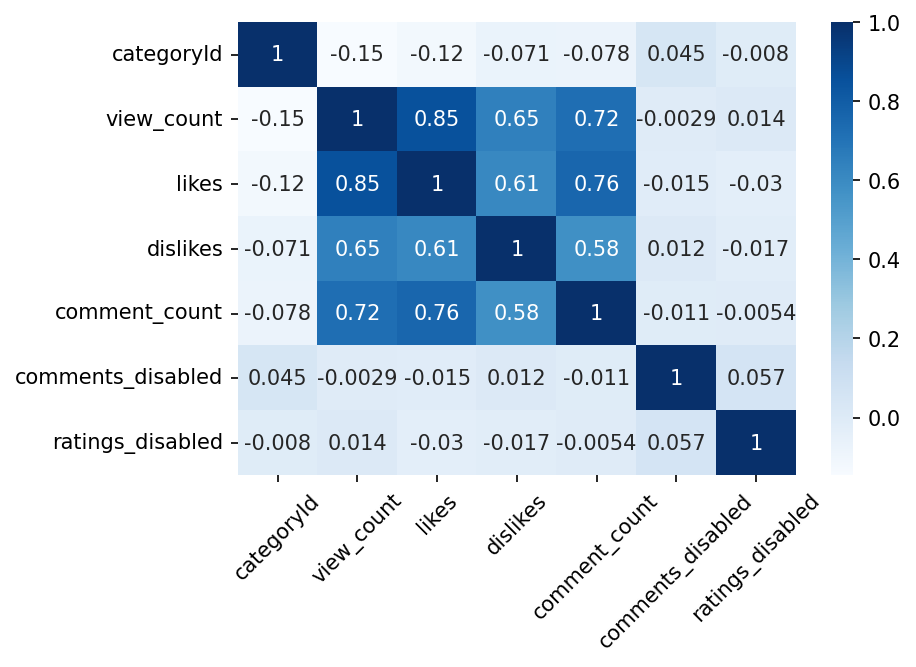

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 150

corr = mx_dataset.corr()
plot = sns.heatmap(corr, annot=True, cmap="Blues")
plt.xticks(rotation=45)


No se identifica ninguna correlación negativa importante entre las columnas, pero si se identifican al menos 2 correlaciones positivas importantes: la presente entre la cantidad de visitas y likes, y la presente entre la cantidad de likes y de comentarios del video.

A continuación, se cargará un segundo dataset asociado al anterior que contiene la información de las categorías de los videos:


In [ ]:
import json

with open('/content/drive/MyDrive/dataset/MX_category_id.json') as f:
    json_data = json.load(f)


mx_categories = pd.json_normalize(json_data, record_path="items")
mx_categories.head()

,kind,etag,id,snippet.title,snippet.assignable,snippet.channelId
0,youtube#videoCategory,IfWa37JGcqZs-jZeAyFGkbeh6bc,1,Film & Animation,True,UCBR8-60-B28hp2BmDPdntcQ
1,youtube#videoCategory,5XGylIs7zkjHh5940dsT5862m1Y,2,Autos & Vehicles,True,UCBR8-60-B28hp2BmDPdntcQ
2,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
3,youtube#videoCategory,ra8H7xyAfmE2FewsDabE3TUSq10,15,Pets & Animals,True,UCBR8-60-B28hp2BmDPdntcQ
4,youtube#videoCategory,7mqChSJogdF3hSIL-88BfDE-W8M,17,Sports,True,UCBR8-60-B28hp2BmDPdntcQ


El archivo **MX_category_id.json** contiene las categorías (*categoryId*) a la que puede pertenecer cada uno de los videos. Las columnas de este archivo son las siguientes:

-   kind (La clase correspondiente al dato, en este caso fijada a "youtube#videoCategory")
-   etag (Texto que corresponde al http etag de este recurso)
-   id (Texto, la identificación única que YouTube usa para identificar la categoría)
-   snippet (Detalles básicos de la categoría en cuestión)
-   title (Descripción de la categoría)
-   assignable (Valor booleano que denota si la categoría puede asignarse)
-   channelId (Identificador del canal único que YouTube otorga a esta categoría)

Las dimensiones de este dataset son, 31 filas y 6 columnas.

In [ ]:
mx_categories.shape

(31, 6)

En total este dataset contiene 30 categorías, a continuación se listan todas las categorías:

In [ ]:
list(mx_categories['snippet.title'].unique())

['Film & Animation',
 'Autos & Vehicles',
 'Music',
 'Pets & Animals',
 'Sports',
 'Short Movies',
 'Travel & Events',
 'Gaming',
 'Videoblogging',
 'People & Blogs',
 'Comedy',
 'Entertainment',
 'News & Politics',
 'Howto & Style',
 'Education',
 'Science & Technology',
 'Movies',
 'Anime/Animation',
 'Action/Adventure',
 'Classics',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Horror',
 'Sci-Fi/Fantasy',
 'Thriller',
 'Shorts',
 'Shows',
 'Trailers']

El dataset mx_dataset contiene, 6819 valores en blanco en la columna `description`.
Para contarlos se reemplazaron las celdas que tuviese un `string` vacío por valores `NaN` para facilitar el conteo de estos. 

In [ ]:
import numpy as np
mx_dataset = mx_dataset.replace(r'^\s*$', np.nan, regex=True)
mx_dataset.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          6819
dtype: int64

El dataset mx_categories no contiene valores nulos o en blanco en ninguna de sus columnas.

In [ ]:
mx_categories = mx_categories.replace(r'^\s*$', np.nan, regex=True)
mx_categories.isnull().sum()

kind                  0
etag                  0
id                    0
snippet.title         0
snippet.assignable    0
snippet.channelId     0
dtype: int64

## Cantidad de videos por categoría
La cantidad de videos que tiene cada categoría para el dataset de México se presenta en el siguiente gráfico:

In [ ]:
mx_categories = mx_categories.astype({'id': 'int64'})
mx_complete = mx_dataset.merge(mx_categories, left_on='categoryId', right_on='id')
mx_complete.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,kind,etag,id,snippet.title,snippet.assignable,snippet.channelId
0,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11 23:00:10,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113999,...,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714314,...,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
2,vX5v6umIWXU,JD Pantoja 12•19 Letra Oficial Y Significado |...,2020-08-10 16:59:41,UCyFZMEnm1il5Wv3a6tPscbA,Genius,10,2020-08-12,genius|rap genius|verified|official lyrics|lyr...,403952,37242,...,https://i.ytimg.com/vi/vX5v6umIWXU/default.jpg,False,False,JD Pantoja’s “12•19” has found a strong audien...,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
3,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353352,...,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
4,9fPQAHV1p78,WONHO 원호 'LOSING YOU' Teaser,2020-08-11 11:00:02,UCQTziMRyGV5vmzdo6pNvQWg,HIGHLINE ENTERTAINMENT,10,2020-08-12,하이라인|highline|하이라인엔터테인먼트|mv|teaser|원호|wonho|we...,291524,72421,...,https://i.ytimg.com/vi/9fPQAHV1p78/default.jpg,False,False,▶More informationWONHO Official Fan cafe : htt...,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ


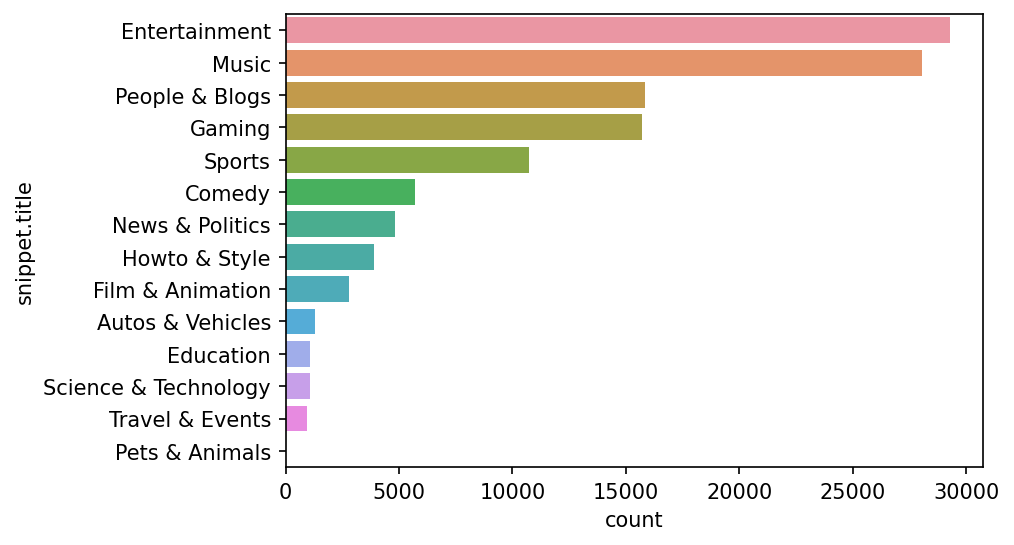

In [ ]:
sns.countplot(y='snippet.title', data=mx_complete, order=mx_complete['snippet.title'].value_counts().index)

Un análisis a simple vista del gráfico denota que existen dos categorías que acumulan la mayor cantidad de videos: Music y Entertainment. Podemos obtener el promedio de la cantidad de videos por categoría:

In [ ]:
mx_complete.groupby(by='snippet.title')['snippet.title'].count().mean()

8661.142857142857

In [ ]:
mx_complete.groupby(by='snippet.title')['snippet.title'].count().median()

4352.5

Se obtiene un valor de 8661 videos por categoría en promedio. Pero debido a que estas dos categorías contienen la mayor cantidad de videos, este valor es deceptivo. También al considerar la media se obtiene el valor de 4352. Dónde se considera que la mitad de las categorías están bajo ese valor (en cantidad de videos) y la otra mitad sobre ese mismo valor.

## Cantidad de likes, dislikes y comentarios

Dentro del análisis exploratorio de los datos se contempla un análisis sobre los likes, dislikes y comentarios para el dataset de trendings de México.

Es importante mencionar que los análisis siguientes se realizaran en comparación a la cantidad de visitas de los videos, que cuentan con una media de 2.249.624 visitas.

In [ ]:
mx_complete['view_count'].mean()

2251100.8428531373

### Visitas vs likes

La cantidad de las visitas vs likes se presenta en el siguiente gráfico de dispersión:

Text(0.5, 0, 'View count')

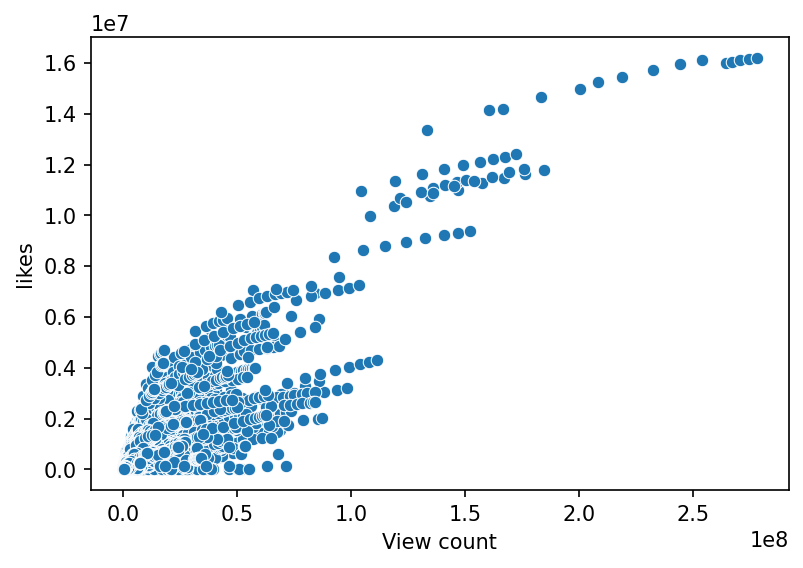

In [ ]:
plot = sns.scatterplot(x='view_count', y='likes', data=mx_complete)
plt.xlabel('View count')

Donde se aprecia que a medida que las visitas aumentan, la cantidad de likes también aumenta, y se percibe al observar el gráfico que su comportamiento podría ser lineal.

In [ ]:
mx_complete['likes'].mean()

160573.0422659497

Es interesante mencionar además, que la cantidad de likes promedio para el caso de México es de 160.530 likes.

### Visitas vs dislikes

La cantidad de las visitas vs dislikes se presenta en el siguiente gráfico de dispersión:

Text(0.5, 0, 'View count')

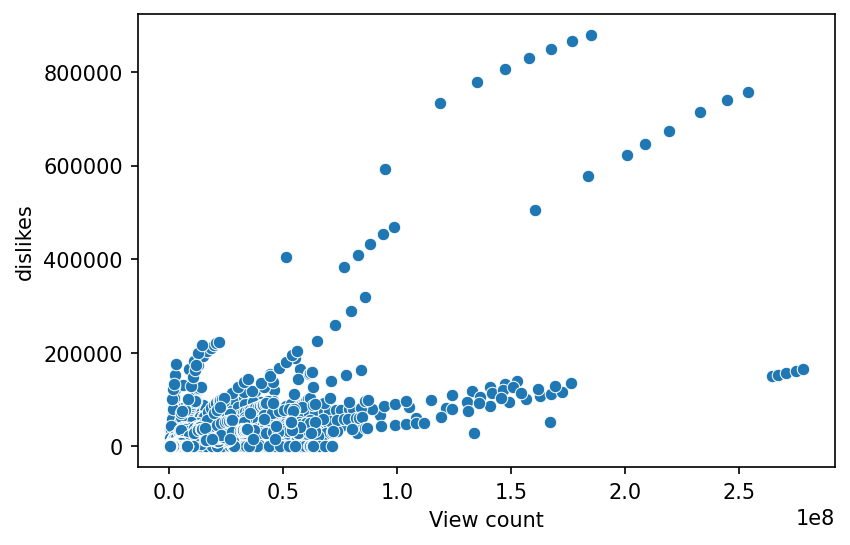

In [ ]:
plot = sns.scatterplot(x='view_count', y='dislikes', data=mx_complete)
plt.xlabel('View count')

En este gráfico ocurre una situación interesante. Si bien a medida que los videos obtienen mayor vista también lo hacen los dislikes, se puede apreciar que la cantidad de dislikes oscila en la mitad de la muestra, y posteriormente se observa una baja de estos dislikes en los videos más vistos.

In [ ]:
mx_complete['dislikes'].mean()

2324.4584103054694

Es interesante mencionar además, que la cantidad de dislikes promedio para el caso de México es de 2.322 likes, muy inferior a la cantidad de likes promedio.

### Visitas vs comentarios

La cantidad de visitas vs cantidad de comentarios se presenta de la siguiente manera:

Text(0.5, 0, 'View count')

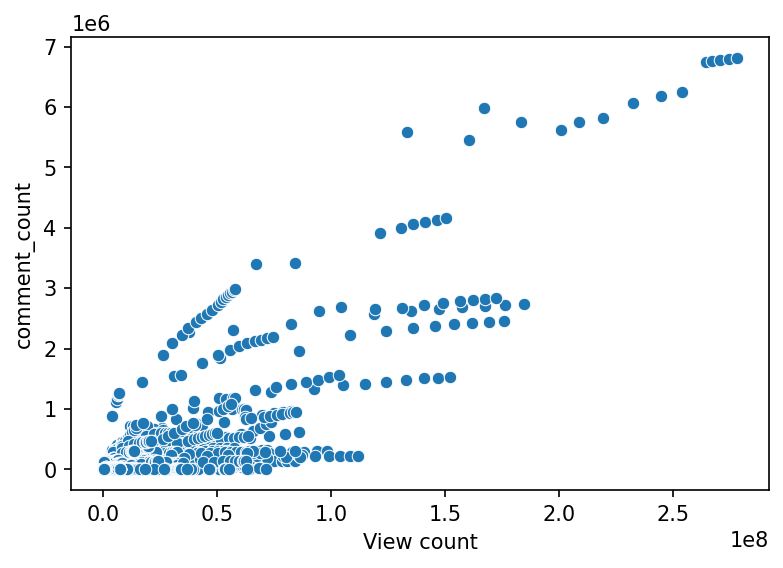

In [ ]:
plot = sns.scatterplot(x='view_count', y='comment_count', data=mx_complete)
plt.xlabel('View count')

Para este caso, la cantidad de comentarios oscila en mayor medida que en los casos anteriores en la mitad de la muestra, no obteniendo un patrón claro, pero a medida que la cantidad de vistas aumenta, la cantidad de comentarios también lo hacen, observablemente en el gráfico, de manera lineal.

In [ ]:
mx_complete['comment_count'].mean()

11995.632636735501

Para el caso de los comentarios, el promedio de estos es de 11,987 comentarios. Una cantidad superior a la de dislikes promedios, pero inferior a la de likes promedios.

### Resumen final de visitas

In [ ]:
mx_complete[['likes', 'dislikes', 'comment_count']].mean()

likes            160573.042266
dislikes           2324.458410
comment_count     11995.632637
dtype: float64

Como resultado, para el caso de México se aprecia que la cantidad de likes corresponde a casi 70 veces más que la cantidad de dislikes, además de que la cantidad de comentarios es muy superior a la cantidad de dislikes. Lo anterior corresponde a un indicativo de la participación de los usuarios en México sobre los videos tanto positivos como negativos, donde los usuarios mexicanos interactúan de forma mayormente positiva a los videos más vistos.

## Comparativa de canales

A continuación se realizará un análisis a los 10 canales con mayor cantidad de videos en la lista de trendings para el dataset de trendings de México.

### Videos en la lista de trendings

Gráfico de top 10 canales con mas videos en la lista de trendings:

In [ ]:
top_10 = mx_complete['channelTitle'].value_counts()[0:10].rename_axis("channelTitle").to_frame("Freq").reset_index()

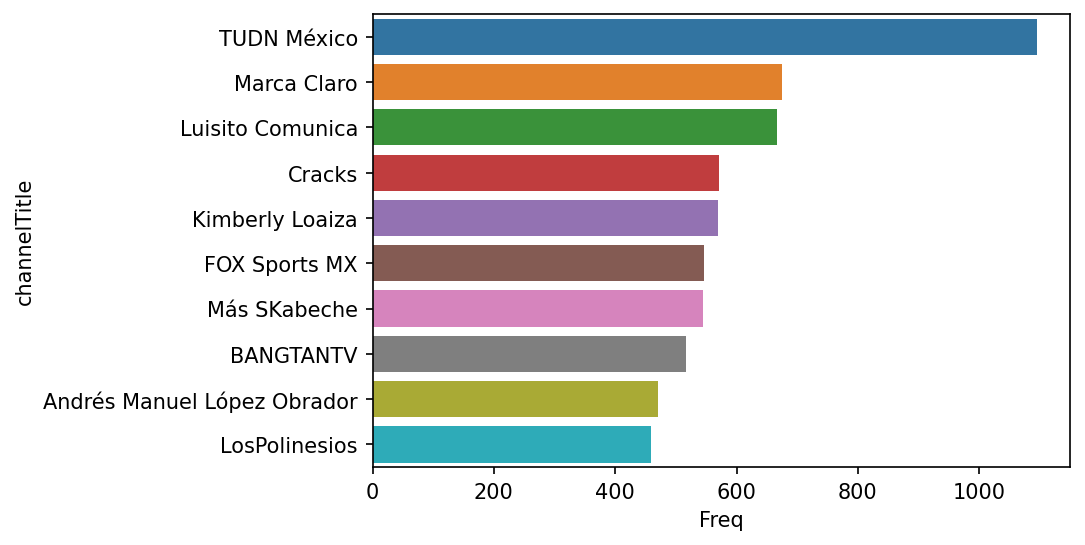

In [ ]:
sns.barplot(x='Freq', y='channelTitle', data=top_10)

### Likes y dislikes de videos en trendings

Gráfico de acumulación de cantidad de likes y dislikes del top 10 canales con más videos en trendings:

In [ ]:
top_10 = mx_complete.groupby(by="channelTitle").agg(
    freq = pd.NamedAgg(column='channelTitle', aggfunc='count'),
    likes = ('likes', sum),
    dislikes = ('dislikes', sum)
).sort_values(by="freq", ascending=False).reset_index()[0:10]

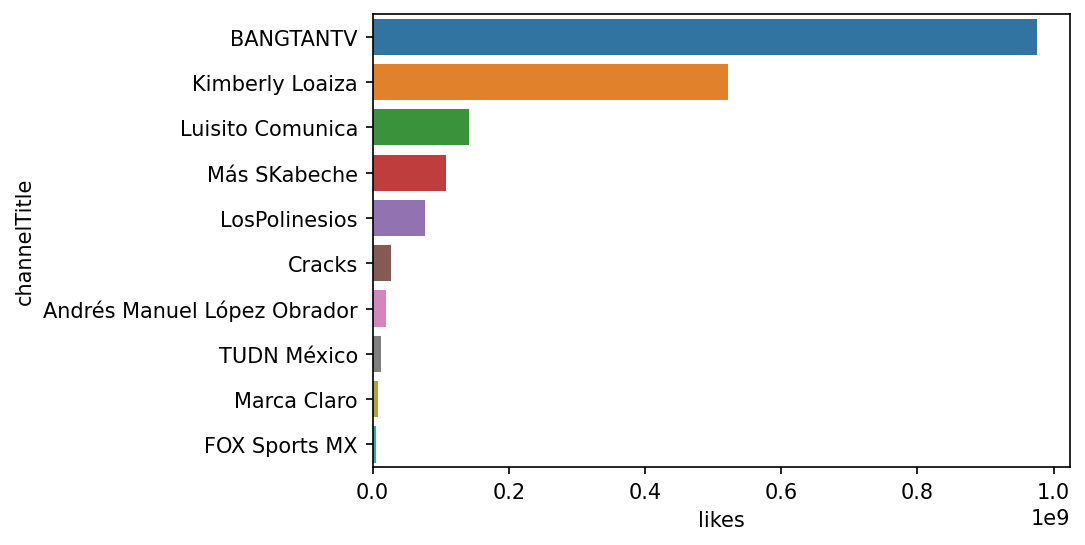

In [ ]:
sns.barplot(x="likes", y="channelTitle", data=top_10, order=top_10.sort_values(by="likes", ascending=False).channelTitle)

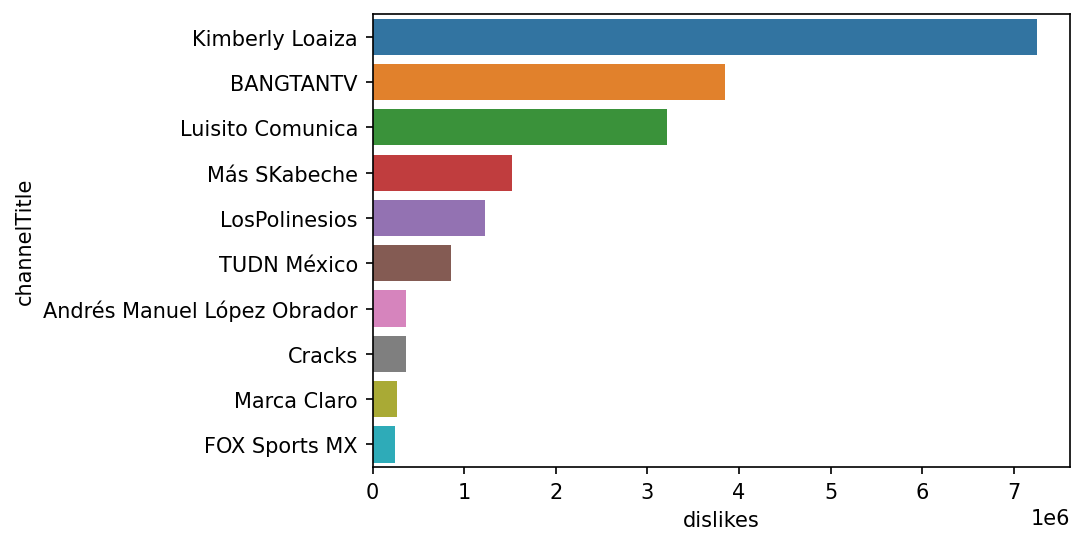

In [ ]:
sns.barplot(x="dislikes", y="channelTitle", data=top_10, order=top_10.sort_values(by="dislikes", ascending=False).channelTitle)

### Mayor cantidad de likes

Gráfico de top 10 canales con mayor acumulación de likes:

In [ ]:
top_10_likes = mx_complete.groupby(by="channelTitle").agg(
    likes = ('likes', sum),
).sort_values(by="likes", ascending=False).reset_index()[0:10]

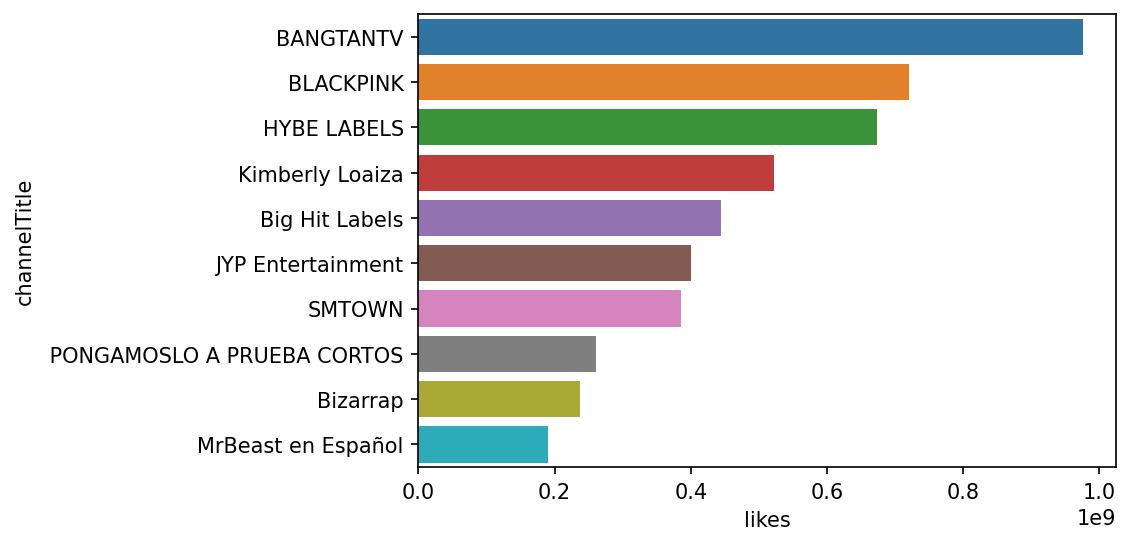

In [ ]:
sns.barplot(x="likes", y="channelTitle", data=top_10_likes)

## Análisis comparativo de todos los países

Si bien el análisis exploratorio inicial se realizó tomando el dataset correspondiente a México, existen muchos otros países dentro del dataset de trendings de YouTube, por lo cual se realizan algunos análisis generales a continuación.

Primero se cargan cada uno de los dataset de los países leyendo el archivo correspondiente.

In [ ]:
mx_dataset = pd.read_csv("/content/drive/MyDrive/dataset/MX_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
us_dataset = pd.read_csv("/content/drive/MyDrive/dataset/US_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
br_dataset = pd.read_csv("/content/drive/MyDrive/dataset/BR_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
ca_dataset = pd.read_csv("/content/drive/MyDrive/dataset/CA_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
de_dataset = pd.read_csv("/content/drive/MyDrive/dataset/DE_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
fr_dataset = pd.read_csv("/content/drive/MyDrive/dataset/FR_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
gb_dataset = pd.read_csv("/content/drive/MyDrive/dataset/GB_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
in_dataset = pd.read_csv("/content/drive/MyDrive/dataset/IN_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
jp_dataset = pd.read_csv("/content/drive/MyDrive/dataset/JP_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
kr_dataset = pd.read_csv("/content/drive/MyDrive/dataset/KR_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)
ru_dataset = pd.read_csv("/content/drive/MyDrive/dataset/RU_youtube_trending_data.csv",
                         parse_dates=['publishedAt', 'trending_date'],
                         date_parser=dateparse)

A continuación agregamos una columna llamada country a cada dataset para identificar el archivo (país) del que se obtuvo cada fila. Esto será de utilidad para análisis posteriores.

In [ ]:
mx_dataset["country"] = "MX"
us_dataset["country"] = "US"
br_dataset["country"] = "BR"
ca_dataset["country"] = "CA"
de_dataset["country"] = "DE"
fr_dataset["country"] = "FR"
gb_dataset["country"] = "BG"
in_dataset["country"] = "IN"
jp_dataset["country"] = "JP"
kr_dataset["country"] = "KR"
ru_dataset["country"] = "RU"

Finalmente, se unen todos los datos en un único dataframe para simplificar los análisis comparativos posteriores.

In [ ]:
dataset = pd.concat([
 mx_dataset,
 us_dataset,
 br_dataset,
 ca_dataset,
 de_dataset,
 fr_dataset,
 gb_dataset,
 in_dataset,
 jp_dataset,
 kr_dataset,
 ru_dataset,
])

In [ ]:
dataset.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11 23:00:10,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113999,4380,5620,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...,MX
1,JOaeND0xUNk,Belinda y Christian Nodal cantan De los besos ...,2020-08-11 18:03:06,UCNVrBkfp4_TG9x4h5kvLeAQ,TV Azteca,24,2020-08-12,tv azteca|videos de tv azteca|azteca uno|en su...,402507,8102,831,803,https://i.ytimg.com/vi/JOaeND0xUNk/default.jpg,False,False,Encendieron el escenario de La Voz. TV AztecaT...,MX
2,SV91jnGs--s,¿QUIÉN HACE LOS MEJORES NUGGETS? | EL GUZII,2020-08-11 19:57:02,UCuGn3ioftOo6jvHE1YK4Bfw,El Guzii,26,2020-08-12,El Guzii|Guzzi|Guzy|Guzii Style|Recetas Divert...,735044,62188,1053,4100,https://i.ytimg.com/vi/SV91jnGs--s/default.jpg,False,False,Si tienes 10 kg de sobre peso tal vez te haz p...,MX
3,QgX0zn5nMyk,Martha Figueroa se disculpa públicamente con N...,2020-08-11 15:57:47,UCJPd6seu4JK4PZjVVTWb0QA,Hoy,24,2020-08-12,Televisa|Televisa espectaculos|programa hoy te...,521751,4680,3129,2285,https://i.ytimg.com/vi/QgX0zn5nMyk/default.jpg,False,False,Mira aquí el contenido exclusivo que tenemos p...,MX
4,cKaM19oAwBM,MAQUILLAJE PARA KIMBERLY LOAIZA✨ RESISTENTE AL...,2020-08-11 21:55:08,UCs5w0QCxsEWz83vuQyOCnuA,Victor Guadarrama,26,2020-08-12,MAQUILLAJE|CELEBS|ARTE|MAKEUP|PESTAÑAS|KIMBERL...,168118,24551,537,782,https://i.ytimg.com/vi/cKaM19oAwBM/default.jpg,False,False,No olvides suscribirte y activar la campanita ...,MX


### Cantidad de videos en trending por país

El siguiente gráfico muestra la cantidad de videos en trending por cada país, es decir, la cantidad de filas que contiene cada uno de los archivos leídos.

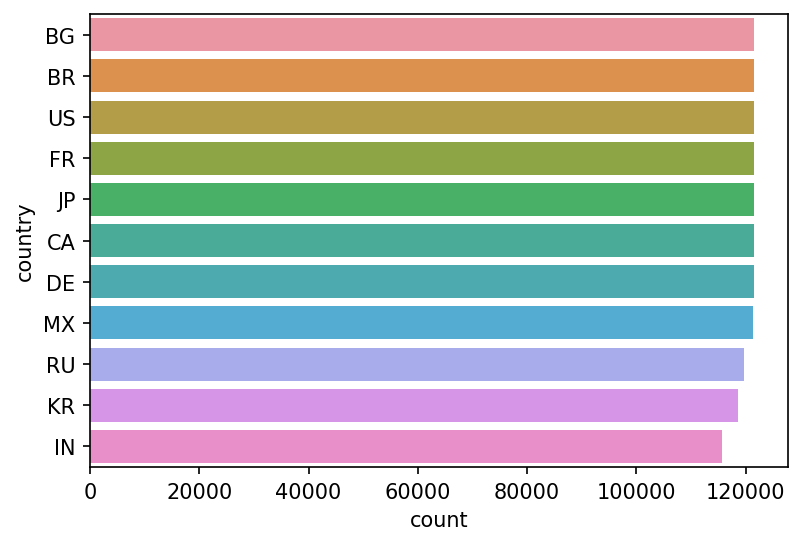

In [ ]:
sns.countplot(y="country", data=dataset, order=dataset['country'].value_counts().index)

Se puede observar que la mayoría de países tiene una cantidad parecida de videos. Esto indica que los conjuntos de datos de cada país tienen semejante cantidad de datos, excepto en los casos de Rusia, Corea e India. Los valores exactos de cantidad de videos por cada país se muestran en la siguiente tabla:

In [ ]:
dataset.groupby("country").agg(amount = pd.NamedAgg(column='country', aggfunc='count')).reset_index()

,country,amount
0,BG,121595
1,BR,121592
2,CA,121544
3,DE,121543
4,FR,121591
5,IN,115660
6,JP,121587
7,KR,118554
8,MX,121399
9,RU,119665


### Cantidad de visitas por pais

La cantidad de visitas de todos los videos en la lista de trendings por país se presenta en el siguiente gráfico:

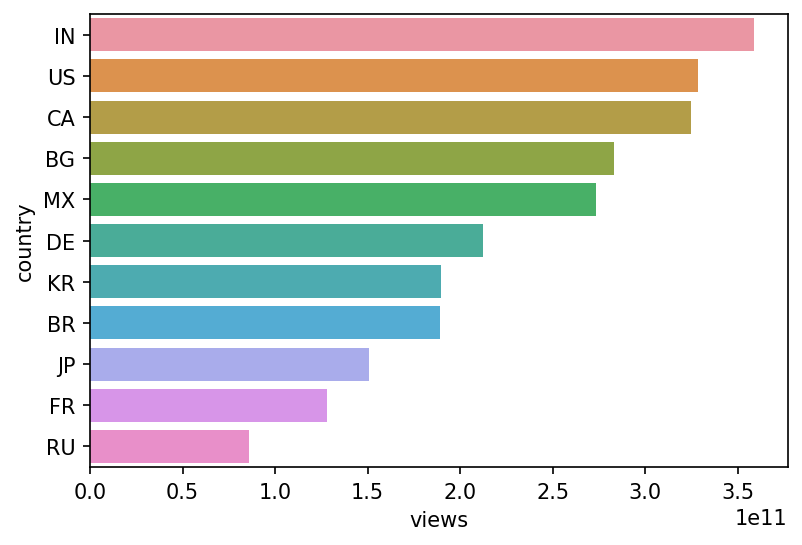

In [ ]:
view_count = dataset.groupby("country").agg(views = ("view_count", sum)).sort_values(by="views", ascending=False).reset_index()
sns.barplot(x="views", y="country", data=view_count)

Los valores reales por país se muestran en la siguiente tabla:

In [ ]:
view_count

,country,views
0,IN,358915195319
1,US,328297983860
2,CA,324491580308
3,BG,283134799392
4,MX,273102109265
5,DE,212396451128
6,KR,189795663834
7,BR,189308405016
8,JP,150921711511
9,FR,127797915943


Los resultados de este análisis son interesantes, ya que el país que más visitas totales acumula es India, el país cuyo conjunto de datos contiene la menor cantidad de registros de dataset completo.

### Canales con más videos en la lista de tendencias

El siguiente gráfico muestra el top 10 de los canales que tienen más videos en las listas de tendencias de todos los países.
Este análisis contempla el periodo temporal total del conjunto de datos.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_

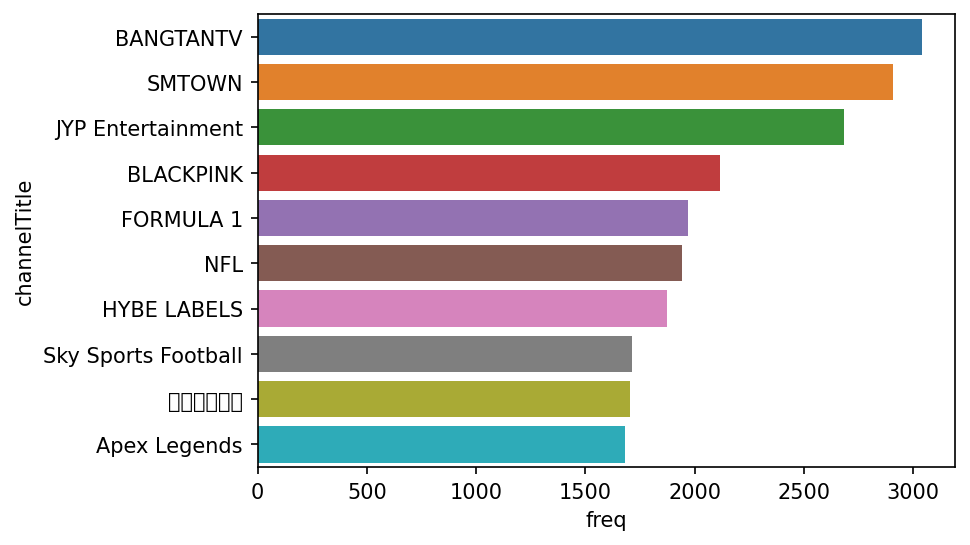

In [ ]:
plt.rc('axes', unicode_minus=False)
top_10_global = dataset.groupby("channelTitle").agg( freq = pd.NamedAgg(column="channelTitle", aggfunc="count")).sort_values(by="freq", ascending=False).reset_index()[0:10]
sns.barplot(x="freq", y="channelTitle", data=top_10_global)

Lo interesante de este gráfico es ver la cantidad de videos en la lista de tendencias que tiene cada canal. Se puede notar que el top 3 tienen una diferencia pequeña en la cantidad de videos comparándolo con el resto de canales.

# Preguntas y problemas

## Preguntas

En base a los resultados obtenidos de los análisis realizados y teniendo en cuenta la motivación descrita al inicio de este documento, nos planteamos dar respuesta a las siguientes preguntas:

1. Predecir la fecha en la que un video entrará a la lista de tendencias de YouTube.
 
2. ¿Existe una cultura general de Youtube que determina las tendencias de los videos, o depende netamente de la cultura del país de dónde se origina?
>
>*Argumentación*: Se entiende como cultura general de Youtube a una serie de características presentes en los videos/canales que gustan a las personas de diferentes nacionalidades, género, etc. Se entiende además como tendencias a los videos que logran una mayor cantidad de reproducciones, vistas y likes. en comparación a los demás en la plataforma.

3. Si es posible agrupar el conjunto de datos en base a ciertas características ¿Cuáles son las características de cada grupo?



## Problemas

No existe una estandarización del concepto “interacción” para un determinado vídeo. Ya que un video “famoso” se compone por una cierta cantidad de interacciones, que están formadas por likes, dislikes, visitas y comentarios. No se identifica cuál de estos criterios tiene mayor o igual valor a los otros.

# Mejoras Hito 1

- Ordenamiento de visualizaciones de frecuencias.
- Utilización del estándar normas APA para las referencias.
- Cambio y reformulación de las preguntas.
- Agregamos nueva exploración de datos para los atributos que representan fechas.

# Propuesta experimental

## Propuesta experimental: Pregunta 1

Para predecir la fecha en la que un modelo entrara a la lista de tendencias de YouTube, primero haremos un tratamiento de los datos para separar las características que representen fechas, siendo estas las columnas: `publishedAt` y `trending_date`. Las separaremos en columnas que contengan el día y el mes por separado. El dato del año no se utilizará en la generación del modelo, ya que solo se tienen datos de los años 2020, 2021 y 2022. Además, este dato no se repetirá en el futuro (como si se repiten los números de los días cada mes, o el número del mes cada año) lo que provocara que el modelo sea menos generalizable para datos futuros.

Los datos serán normalizados, ya que las características numéricas tienen distintas escalas, como en el caso de cantidad de visitas y el día (en números) que se subió el video. En esta tarea usaremos la clase `MinMaxScaler` de la librería Scikit-Learn debido a su facilidad de uso.  

Puesto que esta tarea busca la predicción de la fecha de entrada a la lista de tendencias, utilizaremos técnicas de clasificación para entrenar un modelo que sea capaz de predecir la fecha deseada. 

Para seleccionar el algoritmo a utilizar compararemos los resultados de los siguientes algoritmos: Decision Trees, K-NN y SVM. Utilizaremos al menos 2 configuraciones distintas de hiperparámetros para cada algoritmo haciendo uso de la funcionalidad `GridSearchCV` que provee la librería Scikit-Learn. De estos seleccionaremos el algoritmo que se empleó en el modelo que presente el mejor rendimiento. Para comparar los algoritmos utilizaremos las métricas: Accuracy, Precision, Recall y F1-score, ya que estas son fácilmente obtenibles a través de un simple método de la librería Scikit-Learn.

En el entrenamiento de los modelos utilizaremos todas las características numéricas y categóricas del conjunto de datos. Algunas de las características que dejaremos fuera serán: *video_id*, *title*, *channelTitle*, *tags*, *thumbnail_link* y *description*. Debido a que tenemos una gran cantidad de datos, separaremos el conjunto de datos en una proporción de 70%-30% para el entrenamiento y testeo del modelo respectivamente.

Una vez hayamos seleccionado el algoritmo a utilizar, entrenaremos otro modelo con el mismo algoritmo, debido a que el día y el mes en que entra a la lista de tendencias se encuentran en diferentes columnas, el primer modelo realizara la predicción del día y el segundo del mes en que entra a la lista de tendencias.

Finalmente, se generará un método que permita efectuar la predicción de la fecha, incluyendo día y mes, ingresando un dato, para facilitar la predicción de nuevos datos.

Si el segundo modelo entrenado no da un buen rendimiento o equivalente al primero, se volverá a realizar el proceso de selección de algoritmos descrito anteriormente, en este caso seleccionando un nuevo algoritmo para la predicción del dato deseado (sea mes o día).


## Propuesta experimental: Pregunta 2

Una de las preguntas propuestas para el proyecto está relacionado a identificar algún tipo de cultura general en YouTube. Como cultura general, se hace referencia a un conjunto de videos que poseen ciertas características que hacen que sean populares en cualquier parte del mundo. Esto quiere decir, que de haber una cultura general en YouTube, existirían videos que serían de los más populares en todos los países del conjunto de datos.

Para identificar si existe una cultura general de YouTube en los videos que se encuentran en tendencias se utilizarán técnicas de visualización de datos, ya que se buscará identificar cuáles son los videos más vistos por cada país. 

En caso de existir una cultura general de YouTube, los videos más vistos se repetirán entre los distintos países. Ese será el punto de partida para identificar si existe o no.

Primero, se generará un gráfico de barras para los 10 videos más vistos por cada país, identificando el nombre del video y las visualizaciones que posea. 

Se identificará si existen videos que se encuentren en todos los gráficos. En caso de que existan, estos videos serán identificados como videos gustados de forma general. 

En la situación de no existir vídeos que se vayan repitiendo entre países, se concluirá que no existe una cultura general de YouTube para los videos en tendencia. En caso de existir, se buscará entender desde qué momento los videos han entrado en tendencia para cada país, utilizando un gráfico de dispersión por cada vídeo con la fecha en la que entraron a tendencias en cada país.

Finalmente, se analizará la fecha de entrada de los videos para cada país, y se comentarán los resultados.

La fecha de entrada a las tendencias resulta interesante, ya que nos puede dar una idea de si un video que se considere popular para la cultura general en YouTube es popular en todos los países al mismo tiempo, o si la popularidad de los videos es generada en diferentes tiempos para cada país en donde es popular.


## Propuesta experimental: Pregunta 3

Para identificar cuáles son las características sobre las cuales se podría realizar el agrupamiento de los datos se pretende la utilización de técnicas de clustering.

Las técnicas de clustering escogidas para la aplicación de esta propuesta son tres: `KMeans`, `AgglomerativeClustering` y `DBSCAN`. Las tres técnicas pertenecen a la librería `sklearn.cluster`.

Se aplicarán estas tres técnicas a nuestro dataset para poder obtener distintos clústers (la cantidad varía según cada técnica). Los clústers obtenidos serán sometidos a distintas técnicas de evaluación. Dentro de las técnicas de evaluación que serán aplicadas están: `Matriz de similitud`, `silhouette_score` (de la librería `sklearn.metrics`), `adjusted_mutual_info_score` y `normalized_mutual_info_score` (de la librería `sklearn.metrics`).

Según la evaluación de los clústers, y por ende de las técnicas aplicadas, se logrará obtener una evaluación de las posibles “características en común” que presentan los clústers, identificando así si realmente se presentan características de los videos que puedan asociarlos entre sí.

En el caso de que estos grupos presenten características en común, entonces se escogerá la técnica de clustering, que entregó esos grupos como resultado, como la correcta y se expondrán los resultados. Analizando las características en común.

En el caso contrario, en el cual no se encuentra ningún grupo, después de haber aplicado todas las formas de clústering consideradas, que presente características en común, entonces se puede concluir de que no existen grupos de vídeos, de tendencia, en común.


# Resultado preliminar

**Preparación del conjunto de datos**

Separamos los datos de las columnas *publishedAt* y *trending_date* a diferentes columnas que contienen el día y el mes de cada fecha.
Se excluye el año, ya que no se repite de manera cíclica como los días o meses, lo que lo hace un dato que es poco generalizable para futuras predicciones del modelo.

In [ ]:
dataset['publish_day'] = dataset.publishedAt.dt.day
dataset['publish_month'] = dataset.publishedAt.dt.month
dataset['trending_day'] = dataset.trending_date.dt.day
dataset['trending_month'] = dataset.trending_date.dt.month
dataset.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,publish_day,publish_month,trending_day,trending_month
0,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11 23:00:10,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113999,...,5620,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...,MX,11,8,12,8
1,JOaeND0xUNk,Belinda y Christian Nodal cantan De los besos ...,2020-08-11 18:03:06,UCNVrBkfp4_TG9x4h5kvLeAQ,TV Azteca,24,2020-08-12,tv azteca|videos de tv azteca|azteca uno|en su...,402507,8102,...,803,https://i.ytimg.com/vi/JOaeND0xUNk/default.jpg,False,False,Encendieron el escenario de La Voz. TV AztecaT...,MX,11,8,12,8
2,SV91jnGs--s,¿QUIÉN HACE LOS MEJORES NUGGETS? | EL GUZII,2020-08-11 19:57:02,UCuGn3ioftOo6jvHE1YK4Bfw,El Guzii,26,2020-08-12,El Guzii|Guzzi|Guzy|Guzii Style|Recetas Divert...,735044,62188,...,4100,https://i.ytimg.com/vi/SV91jnGs--s/default.jpg,False,False,Si tienes 10 kg de sobre peso tal vez te haz p...,MX,11,8,12,8
3,QgX0zn5nMyk,Martha Figueroa se disculpa públicamente con N...,2020-08-11 15:57:47,UCJPd6seu4JK4PZjVVTWb0QA,Hoy,24,2020-08-12,Televisa|Televisa espectaculos|programa hoy te...,521751,4680,...,2285,https://i.ytimg.com/vi/QgX0zn5nMyk/default.jpg,False,False,Mira aquí el contenido exclusivo que tenemos p...,MX,11,8,12,8
4,cKaM19oAwBM,MAQUILLAJE PARA KIMBERLY LOAIZA✨ RESISTENTE AL...,2020-08-11 21:55:08,UCs5w0QCxsEWz83vuQyOCnuA,Victor Guadarrama,26,2020-08-12,MAQUILLAJE|CELEBS|ARTE|MAKEUP|PESTAÑAS|KIMBERL...,168118,24551,...,782,https://i.ytimg.com/vi/cKaM19oAwBM/default.jpg,False,False,No olvides suscribirte y activar la campanita ...,MX,11,8,12,8


**Preparación de los conjuntos de pruebas y entrenamiento**

Teniendo en cuenta los resultados obtenidos en pruebas preliminares, hemos decidido utilizar una muestra menor del conjunto de datos, ya que si utilizamos todos los datos que tenemos los procesos de entrenamiento de los modelos tomaban un tiempo excesivo para terminar la ejecución.

La muestra que usaremos tiene un tamaño del 30% del conjunto de datos original y es obtenida de manera aleatoria, aunque usamos el parámetro `random_state` para asegurar la reproducibilidad del estudio.


In [ ]:
sample_dataset = dataset.sample(frac = 0.3, random_state = 11)
sample_dataset.shape

(397896, 21)

Seleccionamos las columnas que utilizaremos para el conjunto de entrenamiento en la variable `X` y en la variable `y` almacenamos las etiquetas de clase.

In [ ]:
columns = ['categoryId', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
           'ratings_disabled', 'publish_day', 'publish_month', 'trending_day']

X = sample_dataset[columns]
y = sample_dataset['trending_month']

Separamos el conjunto de datos en una proporción de 70%-30% para los conjuntos de entrenamiento y de pruebas respectivamente.
Utilizamos el parámetro `stratify` para asegurarnos que los subconjuntos generados mantengan las mismas proporciones de las etiquetas de clase. También usamos el parámetro `random_state` para asegurar la reproducibilidad del estudio.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.30,
                                                    stratify=y,
                                                    random_state=11)

Normalizamos los datos utilizando la clase `MinMaxScaler` para que estos estén a una misma escala obteniendo valores entre 0 y 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

month_scaler = MinMaxScaler().fit(X_train)
X_train_norm = month_scaler.transform(X_train)
X_test_norm = month_scaler.transform(X_test)

**Entrenamiento de los modelos para predecir el mes**

Primero definiremos los algoritmos que utilizaremos y los parámetros a probar.
Utilizaremos la métrica `f1_weighted` como valor de comparación para seleccionar los mejores parámetros utilizando la clase `GridSearchCV`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

score = 'f1_weighted'

dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 7, 10]}
month_dt = GridSearchCV(DecisionTreeClassifier(random_state = 11), 
                   param_grid = dt_params, 
                   cv = 3,
                   scoring = score)

knn_params = {'n_neighbors': [5, 7, 10], 'weights': ['uniform','distance']}
month_knn = GridSearchCV(KNeighborsClassifier(), 
                   param_grid = knn_params, 
                   cv = 3,
                   scoring = score)

svm_params = {'C': [1, 10], 'gamma': [0.01, 0.001]}
month_svm = GridSearchCV(SVC(random_state = 11, max_iter = 50), 
                   param_grid = svm_params, 
                   cv = 3,
                   scoring = score)

In [ ]:
month_dt.fit(X_train_norm, y_train) 
print("Decision tree:", month_dt.best_params_)

Decision tree: {'criterion': 'entropy', 'max_depth': 10}


In [ ]:
month_knn.fit(X_train_norm, y_train)
print("K-nearest neighbors:", month_knn.best_params_)

K-nearest neighbors: {'n_neighbors': 5, 'weights': 'distance'}


Para el entrenamiento del modelo que utiliza Support Vector Machines se limitó la cantidad de iteraciones que se realizan, ya que en una prueba anterior el algoritmo estuvo ejecutándose por más de 30 min.

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

month_svm.fit(X_train_norm, y_train) 
print("Support Vector Machines:", month_svm.best_params_)

Support Vector Machines: {'C': 10, 'gamma': 0.01}


**Resultado de las predicciones**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
month_dt_y_pred = month_dt.predict(X_test_norm)  
print("-------------------- Decision Trees --------------------")
print("Accuracy: ", accuracy_score(y_test, month_dt_y_pred))
print(classification_report(y_test, month_dt_y_pred))

-------------------- Decision Trees --------------------
Accuracy:  0.9994387152443264
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12247
           2       1.00      1.00      1.00     10771
           3       1.00      1.00      1.00     12397
           4       1.00      1.00      1.00      7222
           5       1.00      1.00      1.00      5046
           6       1.00      1.00      1.00      8752
           7       1.00      1.00      1.00      6144
           8       1.00      1.00      1.00      9929
           9       1.00      1.00      1.00     11668
          10       1.00      1.00      1.00     12014
          11       1.00      1.00      1.00     11451
          12       1.00      1.00      1.00     11728

    accuracy                           1.00    119369
   macro avg       1.00      1.00      1.00    119369
weighted avg       1.00      1.00      1.00    119369



In [ ]:
month_knn_y_pred = month_knn.predict(X_test_norm)  
print("-------------------- K-Nearest Neighbors --------------------")
print("Accuracy: ", accuracy_score(y_test, month_knn_y_pred))
print(classification_report(y_test, month_knn_y_pred))

-------------------- K-Nearest Neighbors --------------------
Accuracy:  0.9976040680578709
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12247
           2       1.00      1.00      1.00     10771
           3       1.00      1.00      1.00     12397
           4       1.00      0.99      1.00      7222
           5       1.00      0.99      0.99      5046
           6       1.00      1.00      1.00      8752
           7       1.00      1.00      1.00      6144
           8       1.00      1.00      1.00      9929
           9       1.00      1.00      1.00     11668
          10       1.00      1.00      1.00     12014
          11       1.00      1.00      1.00     11451
          12       1.00      1.00      1.00     11728

    accuracy                           1.00    119369
   macro avg       1.00      1.00      1.00    119369
weighted avg       1.00      1.00      1.00    119369



In [ ]:
month_svm_y_pred = month_svm.predict(X_test_norm)  
print("-------------------- Support Vector Machines --------------------")
print("Accuracy: ", accuracy_score(y_test, month_svm_y_pred))
print(classification_report(y_test, month_svm_y_pred))

-------------------- Support Vector Machines --------------------
Accuracy:  0.450351431276127
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     12247
           2       0.27      0.38      0.31     10771
           3       0.50      0.65      0.56     12397
           4       0.04      0.02      0.03      7222
           5       0.19      0.33      0.24      5046
           6       0.07      0.04      0.05      8752
           7       0.26      0.44      0.33      6144
           8       0.60      0.41      0.49      9929
           9       0.64      0.91      0.76     11668
          10       0.86      0.50      0.63     12014
          11       0.47      0.57      0.52     11451
          12       0.59      0.82      0.69     11728

    accuracy                           0.45    119369
   macro avg       0.37      0.42      0.38    119369
weighted avg       0.41      0.45      0.41    119369



Como se puede observar en las métricas de clasificación, el modelo entrenado con el algoritmo SVM fue el que tuvo los peores resultados, lo cual es consecuente con la limitación de iteraciones que impusimos para el entrenamiento de este modelo. Si bien es probable que se pudiesen obtener un mejor rendimiento del modelo si no limitásemos la cantidad de iteraciones, el tiempo de entrenamiento aumenta considerablemente y es mucho más tardío en comparación a los demás modelos entrenados.

El modelo a elegir es el entrenado con el algoritmo Decision Trees, el cual tiene métricas de clasificación parecidas a las del modelo de K-NN, pero el primero tomó menos de un minuto para el entrenamiento del modelo, mientras que el segundo se tardó alrededor de 10 min.

**Entrenamiento del modelo para predecir el día**

Para el entrenamiento del modelo que predecirá el día en que un video entra a la lista de tendencias, utilizaremos el algoritmo DecisionTrees con los parámetros que se obtuvieron en el paso anterior `criterion = 'entropy'` y `max_depth = 10`

In [ ]:
columns = ['categoryId', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
           'ratings_disabled', 'publish_day', 'publish_month', 'trending_month']

X = sample_dataset[columns]
y = sample_dataset['trending_day']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.30,
                                                    stratify=y,
                                                    random_state=11)

day_scaler = MinMaxScaler().fit(X_train)
X_train_norm = day_scaler.transform(X_train)
X_test_norm = day_scaler.transform(X_test)

day_dt = DecisionTreeClassifier(random_state = 11)
day_dt.fit(X_train_norm, y_train)

day_dt_y_pred = day_dt.predict(X_test_norm)  
print("-------------------- Decision Trees --------------------")
print("Accuracy: ", accuracy_score(y_test, day_dt_y_pred))
print(classification_report(y_test, day_dt_y_pred))

-------------------- Decision Trees --------------------
Accuracy:  0.25282108420109073
              precision    recall  f1-score   support

           1       0.38      0.35      0.36      4076
           2       0.31      0.31      0.31      4339
           3       0.25      0.25      0.25      4104
           4       0.24      0.24      0.24      3904
           5       0.23      0.23      0.23      4136
           6       0.23      0.23      0.23      3914
           7       0.25      0.25      0.25      4138
           8       0.24      0.24      0.24      3888
           9       0.22      0.22      0.22      3937
          10       0.22      0.22      0.22      3917
          11       0.24      0.25      0.24      3956
          12       0.24      0.24      0.24      4101
          13       0.24      0.24      0.24      4134
          14       0.26      0.26      0.26      4053
          15       0.24      0.24      0.24      4132
          16       0.24      0.25      0.25    

Vemos que no se obtienen resultados favorables con los parámetros anteriores, por lo tanto, volveremos a realizar el proceso para comparar los distintos algoritmos.

In [ ]:
score = 'f1_weighted'

dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 7, 10]}
day_dt = GridSearchCV(DecisionTreeClassifier(random_state = 11), 
                   param_grid = dt_params, 
                   cv = 3,
                   scoring = score)

knn_params = {'n_neighbors': [5, 7, 10], 'weights': ['uniform','distance']}
day_knn = GridSearchCV(KNeighborsClassifier(), 
                   param_grid = knn_params, 
                   cv = 3,
                   scoring = score)

svm_params = {'C': [1, 10], 'gamma': [0.01, 0.001]}
day_svm = GridSearchCV(SVC(random_state = 11, max_iter = 50), 
                   param_grid = svm_params, 
                   cv = 3,
                   scoring = score)

In [ ]:
day_dt.fit(X_train_norm, y_train) 
print("Decision tree:", day_dt.best_params_)

Decision tree: {'criterion': 'gini', 'max_depth': 10}


In [ ]:
day_knn.fit(X_train_norm, y_train)
print("K-nearest neighbors:", day_knn.best_params_)

K-nearest neighbors: {'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
day_svm.fit(X_train_norm, y_train) 
print("Support Vector Machines:", day_svm.best_params_)

Support Vector Machines: {'C': 1, 'gamma': 0.01}


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
day_dt_y_pred = day_dt.predict(X_test_norm)  
print("-------------------- Decision Trees --------------------")
print("Accuracy: ", accuracy_score(y_test, day_dt_y_pred))
print("F1: ", f1_score(y_test, day_dt_y_pred, average = 'weighted'))

-------------------- Decision Trees --------------------
Accuracy:  0.20331911970444588
F1:  0.19671178590480773


In [ ]:
day_knn_y_pred = day_knn.predict(X_test_norm)  
print("-------------------- K-Nearest Neighbors --------------------")
print("Accuracy: ", accuracy_score(y_test, day_knn_y_pred))
print("F1: ", f1_score(y_test, day_knn_y_pred, average = 'weighted'))

-------------------- K-Nearest Neighbors --------------------
Accuracy:  0.24834756092452814
F1:  0.2483610083878921


In [ ]:
day_svm_y_pred = day_svm.predict(X_test_norm)  
print("-------------------- Support Vector Machines --------------------")
print("Accuracy: ", accuracy_score(y_test, day_svm_y_pred))
print("F1: ", f1_score(y_test, day_svm_y_pred, average = 'weighted'))

-------------------- Support Vector Machines --------------------
Accuracy:  0.03511799545945765
F1:  0.013366933813444743


Se observa que ninguno de los modelos entrenados obtiene buenos resultados en las métricas de clasificación observadas (exactitud y F1). El modelo entrenado con K-NN fue el que obtuvo los mejores resultados, pero estos siguen siendo demasiado bajos como para intentar predecir el día y acertar con cierta regularidad.

Para asegurarnos de que los modelos tuvieron malos resultados debido a que utilizamos una muestra del conjunto de datos, y aprovechándonos de que al utilizar el algoritmo Decision Trees el tiempo de entrenamiento del modelo no aumenta significativamente al aumentar la cantidad de datos, volveremos a entrenar un modelo con Decision Trees pero esta vez utilizando todo el conjunto de datos.

In [ ]:
columns = ['categoryId', 'view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
           'ratings_disabled', 'publish_day', 'publish_month', 'trending_month']

X = dataset[columns]
y = dataset['trending_day']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.30,
                                                    stratify=y,
                                                    random_state=11)

day_scaler = MinMaxScaler().fit(X_train)
X_train_norm = day_scaler.transform(X_train)
X_test_norm = day_scaler.transform(X_test)

score = 'f1_weighted'

dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 7, 10]}
day_dt = GridSearchCV(DecisionTreeClassifier(random_state = 11), 
                   param_grid = dt_params, 
                   cv = 3,
                   scoring = score)
                
day_dt.fit(X_train_norm, y_train) 
print("Decision tree:", day_dt.best_params_)

day_dt_y_pred = day_dt.predict(X_test_norm)  
print("-------------------- Decision Trees --------------------")
print("Accuracy: ", accuracy_score(y_test, day_dt_y_pred))
print("F1: ", f1_score(y_test, day_dt_y_pred, average = 'weighted'))

Decision tree: {'criterion': 'gini', 'max_depth': 10}
-------------------- Decision Trees --------------------
Accuracy:  0.20742051334893202
F1:  0.20406952320873875


Vemos que las métricas de clasificación tuvieron una mejora ínfima respecto del mismo modelo entrenado utilizando una muestra más pequeña.

**Conclusión**

No es posible predecir la fecha en la que un video entrara a la lista de tendencias de YouTube. Si bien, de los modelos entrenados se puede predecir con bastante exactitud el mes en el que un video entrara a la lista de tendencias, consideramos que la predicción de este dato no es de gran importancia o utilidad, ya que, como se muestra a continuación, solo el 15% de los videos incluidos en los datos entra a la lista de tendencias en un mes diferente al que se subió a la plataforma.

In [ ]:
different = dataset.loc[dataset['publish_month'] != dataset['trending_month']].shape[0]
total = dataset.loc[dataset['publish_month'] == dataset['trending_month']].shape[0]

print(different*100/total, "%")

15.203533443065792 %


# Repositorio GitHub

El proyecto se documenta en un repositorio de GitHub, donde se podrá acceder en el siguiente link:

[Repositorio de Github](https://github.com/Jjaraa/yt-trending)

# Lista de presentaciones

Se agregarán los links para acceder a los videos de las presentaciones del proyecto en la lista a continuación:

[Presentación Hito 1](https://drive.google.com/file/d/1FtXd9IpnTddy92ABYJQkYAO-QjKWWMUk/view?usp=sharing)

# Responsabilidades del grupo de trabajo

**Sebastian Pardo**: Estuvo a cargo de la redacción de las secciones: Introducción y Preguntas y Problemas. Se encargó del desarrollo del análisis inicial del archivo *MX_category_id.json*, la matriz de correlación del dataset de Mexico y los gráficos: *Cantidad de videos por categoría*, *Visitas vs likes*, *Visitas vs dislikes*, *Visitas vs comentarios*, *Top 10 canales con mas videos*, *Matriz de correlación entre los atributos*, *Cantidad de videos en trending por país*, *Cantidad de visitas por país* y *Canales con mas videos en la lista de tentendias (global)* . Finalmente se hizo cargo del desarrollo de la subsección *Análisis comparativo de todos los países*. Para el hito 2 se encargó de traspasar el informe a un Jupyter Notebook. El desarrollo de la propuesta experimental para la pregunta 1 y la seccion "Resultado preliminar"

**Mauricio Campos**: Se encargó de redactar y explicar cada columna del dataset usado para el desarrollo del informe (mx_dataset y MX_category_id). También se encargó del desarrollo exploratorio de la sección *Cantidad de videos por categoria*. 

**Jonathan Jara**: Se encargó del análisis de las subsecciones de *Visitas vs likes*, *Visitas vs dislikes*, *Visitas vs comentarios*, de planificar la estructura de trabajo con el versionamiento en el repositorio, de la estructura general del informe, creación de secciones y subsecciones, argumentación de la sección Preguntas y Problemas para las preguntas y planteamiento para el problema identificado. También se encargó de sintentizar los resultados del analisis exploratorio para las subsecciones analizadas por el en la subseccion *Resumen final de visitas*. Para el hito 2 se encargó de crear la propuesta 2 en el informe, de resumir el resultado preliminar en la presentación, de contextualizar el proyecto en la presentación y de describir terminologías como cultura general de Youtube y videos en tendencias para la presentación e informe.


# Referencias

[1] Statista. (2022, March 8). Global social networks ranked by number of users 2022. https://www.statista.com/statistics/272014/global-social-networks-ranked-by-number-of-users/

[2] Statista. (2021, July 20). Youtube users in the World 2017–2025. https://www.statista.com/forecasts/1144088/youtube-users-in-the-world

[3] Statista. (2022b, April 28). Media usage in an online minute 2021. https://www.statista.com/statistics/195140/new-user-generated-content-uploaded-by-users-per-minute/

[4] Statista. (2022b, April 4). Hours of video uploaded to YouTube every minute 2007–2020. https://www.statista.com/statistics/259477/hours-of-video-uploaded-to-youtube-every-minute/

[5] Google, LLC. (n.d.). Tendencias de YouTube - Ayuda de YouTube. Ayuda de YouTube. https://support.google.com/youtube/answer/7239739?hl=es-419



In [ ]:
%%shell
jupyter nbconvert --to html yt_trending.ipynb

[NbConvertApp] Converting notebook yt_trending.ipynb to html
[NbConvertApp] Writing 1115999 bytes to yt_trending.html
